Running this file will make a csv file called pca_transformed_data.csv which will contain the new features to use for K means clustering (which explain 95% of the variance- but we can change this accordingly)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler




In [6]:
#Enzo sent me the directly preprocessed file because I don't have enough storage right now
#But you can just run the pipeline otherwise
df = pd.read_csv('../../knnData/BA_US_knn_text.csv')


In [7]:
df.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating,text,avg,user_state,beer_state
0,Kupfer Kolsch,289320.0,Copper State Brewing Company,49595.0,Kölsch,4.4,n2185.211743,2.50,4.00,4.00,3.75,3.75,3.76,NaN,3.76,North Carolina,Wisconsin
1,Northwestern Alt,289321.0,Copper State Brewing Company,49595.0,Altbier,4.6,n2185.211743,3.00,3.75,4.00,3.50,3.50,3.58,NaN,3.58,North Carolina,Wisconsin
2,One Cent Wheat,289319.0,Copper State Brewing Company,49595.0,Witbier,5.4,n2185.211743,3.75,3.25,3.75,3.50,3.50,3.48,NaN,3.48,North Carolina,Wisconsin


In [8]:
columns_to_drop = ['beer_name', 'beer_id','brewery_name','avg','user_state', 'beer_state', 'text']

# Drop the specified columns
X = df.drop(columns=columns_to_drop)
y = df['user_state']

X.head(3)

,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating
0,49595.0,Kölsch,4.4,n2185.211743,2.50,4.00,4.00,3.75,3.75,3.76
1,49595.0,Altbier,4.6,n2185.211743,3.00,3.75,4.00,3.50,3.50,3.58
2,49595.0,Witbier,5.4,n2185.211743,3.75,3.25,3.75,3.50,3.50,3.48


In [9]:

#one hot encode beer style
#frequency encode brewery_id and user_id

X = pd.get_dummies(X, columns=['style'], prefix=['style'])
user_frequency = X['user_id'].value_counts() / len(X)  # Frequency of each user_id

# Map each user_id to its frequency
X['user_id_encoded'] = X['user_id'].map(user_frequency)
brewery_frequency = X['brewery_id'].value_counts() / len(X)  # Frequency of each brewery_id

# Map each brewery_id to its frequency
X['brewery_id_encoded'] = X['brewery_id'].map(brewery_frequency)
X = X.drop(columns=['user_id', 'brewery_id'])

#label encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


X.head(3)


,abv,appearance,aroma,palate,taste,overall,rating,style_Altbier,style_American Adjunct Lager,style_American Amber / Red Ale,...,style_Scottish Gruit / Ancient Herbed Ale,style_Smoked Beer,style_Tripel,style_Vienna Lager,style_Weizenbock,style_Wheatwine,style_Winter Warmer,style_Witbier,user_id_encoded,brewery_id_encoded
0,4.4,2.50,4.00,4.00,3.75,3.75,3.76,False,False,False,...,False,False,False,False,False,False,False,False,0.00036,0.000001
1,4.6,3.00,3.75,4.00,3.50,3.50,3.58,True,False,False,...,False,False,False,False,False,False,False,False,0.00036,0.000001
2,5.4,3.75,3.25,3.75,3.50,3.50,3.48,False,False,False,...,False,False,False,False,False,False,False,True,0.00036,0.000001


In [10]:

'''
# Assuming your DataFrame is named 'X' and the target variable is 'y' (already defined)

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)  # Limit the depth of each tree
rf.fit(X, y)

# Fit the model on the data
rf.fit(X, y)'''


"\n# Assuming your DataFrame is named 'X' and the target variable is 'y' (already defined)\n\n# Initialize the RandomForestClassifier\nrf = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=42)  # Limit the depth of each tree\nrf.fit(X, y)\n\n# Fit the model on the data\nrf.fit(X, y)"

In [11]:
'''# Get feature importances from the trained model
feature_importances = rf.feature_importances_

feature_names = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature rankings

feature_importance_df.head(15)'''

"# Get feature importances from the trained model\nfeature_importances = rf.feature_importances_\n\nfeature_names = X.columns\n\nfeature_importance_df = pd.DataFrame({\n    'Feature': feature_names,\n    'Importance': feature_importances\n})\n\nfeature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)\n\n# Print the feature rankings\n\nfeature_importance_df.head(15)"

In [13]:
'''# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Ranking')
plt.gca().invert_yaxis()
plt.show('''


"# Plot the feature importances\nplt.figure(figsize=(12, 8))\nplt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])\nplt.xlabel('Feature Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance Ranking')\nplt.gca().invert_yaxis()\nplt.show("

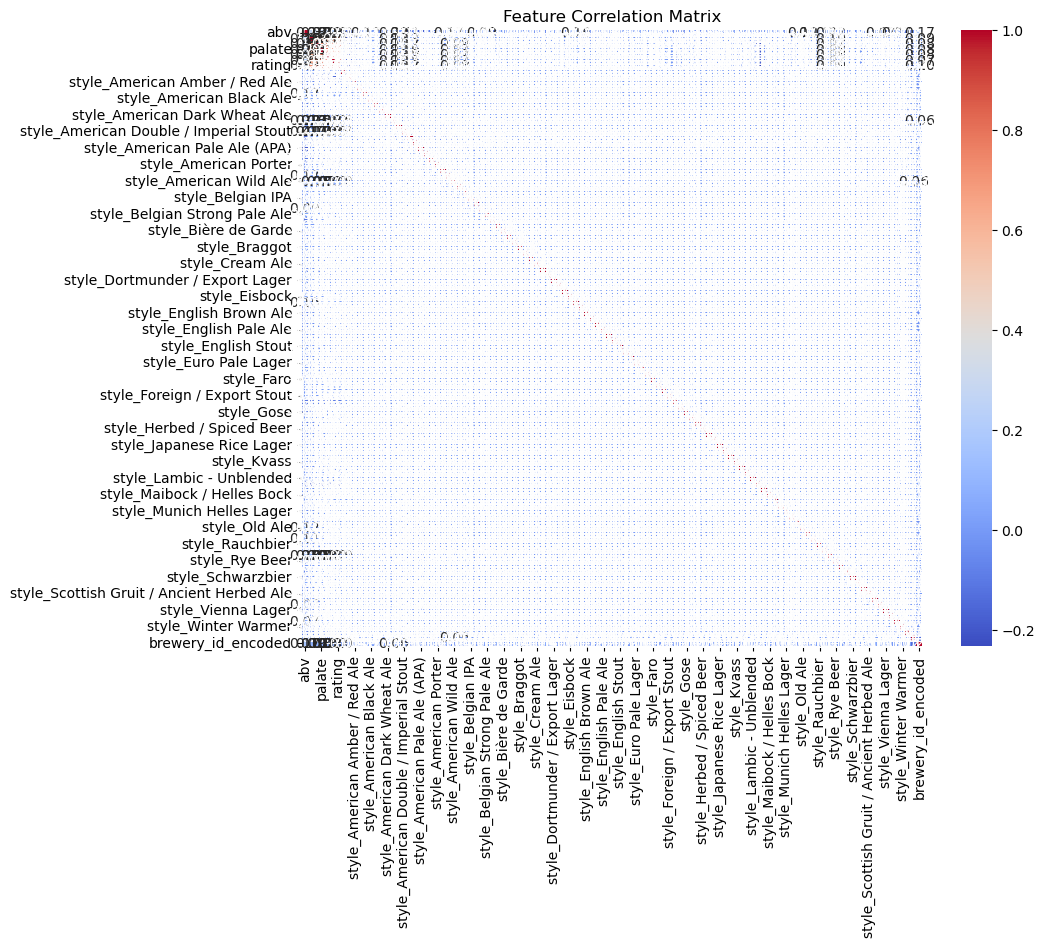

In [14]:
#covariance matrix to remove highly correlated variables first
#PCA to reduce feature dimension

corr_matrix = X.corr()  # Compute correlation matrix for your features

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
threshold = 0.8
# Extract the upper triangle of the correlation matrix (excluding diagonal)
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find all feature pairs with correlation above the threshold
high_corr_pairs = []
for i in range(len(upper_triangle.columns)):
    for j in range(i + 1, len(upper_triangle.columns)):
        if abs(upper_triangle.iloc[i, j]) > threshold:  # Check threshold
            high_corr_pairs.append(
                (upper_triangle.index[i], upper_triangle.columns[j], upper_triangle.iloc[i, j])
            )

# Create a DataFrame to display the results
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature1", "Feature2", "Correlation"])
print("Features with more than a 0.8 correlation value")
print(high_corr_df)

Features with more than a 0.8 correlation value
  Feature1 Feature2  Correlation
0    aroma   rating     0.883635
1   palate   rating     0.858498
2    taste  overall     0.878233
3    taste   rating     0.963339
4  overall   rating     0.931130


Manually removing features: Remove aroma (since rating is central and likely more informative).
Remove palate (same reasoning).
Remove overall (keep taste or vice versa). (for now lets keep overall and remove taste)

In [19]:
features_to_remove = ['aroma', 'palate', 'overall']
X = X.drop(columns=features_to_remove)

In [20]:
iter_imputer = IterativeImputer(random_state=42)
X_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(X), columns=X.columns)

print(X_iter_imputed.isnull().sum())

#scaler = StandardScaler()
scaler = RobustScaler()
#scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_iter_imputed), columns=X_iter_imputed.columns)

MemoryError: Unable to allocate 5.14 GiB for an array with shape (6331638, 109) and data type float64

In [ ]:
#plotting variance sum graph before PCA
# Calculate variance for each feature in the original dataset
feature_variance = X_scaled.var()  # Variance of each feature


plt.figure(figsize=(10, 6))
plt.plot(feature_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Variance Sum of Features Before PCA')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()

In [ ]:
# Initialize PCA - Set the number of components you want
pca = PCA(n_components=0.95)  # Keep 95% of variance, adjust as necessary

# Fit PCA on scaled data
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame from the PCA components
X_pca_df = pd.DataFrame(X_pca)

In [ ]:
# 2. Plot the variance explained by each principal component
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
             y=pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, len(pca.explained_variance_ratio_) + 1),
             y=np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# 3. Save the PCA-transformed data to a CSV file
X_pca_df.to_csv('pca_transformed_data.csv', index=False)

print("PCA transformed data saved as 'pca_transformed_data.csv'")